# El Farol Bar Problem (Arthur, 1994)

### Submitted by:
- Lex Zedrick Lorenzo
- Nigel Haim Sebastian

Every week, a group of people decides independently whether to go to a popular bar. If the bar is too crowded, they don't enjoy it. If too few people go, it's not lively enough. Each person must predict attendance and decide whether to go.

## Problem Selection

El Farol Bar

## Modeling Approach

The El Farol Bar goal is to determine what is the optimal strategy of every entity to go to the bar and have fun while not getting the bar overcrowded. 

Key features for agents: 
- Agents has a memory whether the person did enjoyed or did not enjoyed the week
- Agents has a given probability whether to go to the bar this week or not 
- Agents tracks an enjoyment attribute. The more they go to the bar the more they likely comeback
- Moods can influence agents probability to go to the bar this week
- Moods are randomized simulating whether if the agent had a good week or not 

Key features for bar: 
- Bar has a popularity rate
- Bar can track weekly attendance 
- Bar can track if the agents enjoyed their time in the bar 

### Other possible features
- Agents can form relationships/feuds with other agants based on the frequency they meet on the bar (baka mahirap)

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_agents = 500
bar_capacity = 60
weeks = 50
num_attendees = []

In [3]:
class Agent:
    def __init__(self, mood='happy'):
        self.memory = []
        self.base_probability = 0.5 
        self.current_probability = self.base_probability
        self.mood = mood 
        self.agent_probability_records = []
        self.mood_records = []
        self.update_probability() 

    def update_mood(self):
        self.mood = random.choice(['happy', 'sad', 'neutral'])
        self.mood_records.append(self.mood)
        self.update_probability()

    def update_probability(self):
        if self.mood == 'happy':
            self.current_probability = min(1.0, self.base_probability + 0.2)
        elif self.mood == 'sad':
            self.current_probability = max(0.0, self.base_probability - 0.2)
        else:
            self.current_probability = self.base_probability

        count_enjoyed = self.memory.count(1)
        count_disliked = self.memory.count(0)

        if count_enjoyed > count_disliked:
            self.current_probability = min(1.0, self.current_probability + 0.5)
        elif count_disliked > count_enjoyed:
            self.current_probability = max(0.0, self.current_probability - 0.5)
        
        self.agent_probability_records.append(self.current_probability)

    def decide_to_go_to_bar(self):
        return 0.50 < self.current_probability

    def end_of_week(self, bar_enjoyment):
        self.memory.append(bar_enjoyment)
    
    def return_num_of_enjoyments(self):
        return self.memory.count(1)

    def return_num_of_dislikes(self):
        return self.memory.count(0)

    def times_visited_bar(self):
        return len(self.memory)
    
    def probability_records(self):
        return self.agent_probability_records

    def __str__(self):
        return f"Agent(enjoyed_bar={self.memory[-1]}, mood={self.mood}, prob={self.current_probability:.2f}, times_enjoyed={self.memory.count(1)}, times_disliked={self.memory.count(0)})"


In [4]:
class Bar:
    def __init__(self, capacity):
        self.capacity = capacity
        self.bar_popularity_record = []
        self.bar_weekly_attendance_record = []


    def __str__(self):
        return f"Bar(Number of attendance = {self.bar_weekly_attendance_record[-1]}, popularity = {self.bar_popularity_record[-1]})"

In [5]:
a = Agent()

In [6]:
agents = [Agent() for _ in range(num_agents)]
bar = Bar(bar_capacity)

In [7]:
for w in range(weeks):
    bar_attendance = []
    bar_popularity = []
    for agent in agents:
        agent.update_mood()
        if agent.decide_to_go_to_bar():
            bar_attendance.append(agent)
    
    for agent in bar_attendance:
        if len(bar_attendance) > bar_capacity:
            bar_enjoyment = 0
            bar_popularity.append((agent.return_num_of_enjoyments() / agent.times_visited_bar()) * 100 if agent.times_visited_bar() > 0 else 0)
        else:
            bar_enjoyment = 1
            bar_popularity.append((agent.return_num_of_enjoyments() / agent.times_visited_bar()) * 100 if agent.times_visited_bar() > 0 else 0)
        agent.end_of_week(bar_enjoyment)
    
    bar.bar_weekly_attendance_record.append(len(bar_attendance))
    bar.bar_popularity_record.append(sum(bar_popularity) / len(bar_popularity) if bar_popularity else 0)
    
    print(f"Week {w}| {bar}")


Week 0| Bar(Number of attendance = 169, popularity = 0.0)
Week 1| Bar(Number of attendance = 116, popularity = 0.0)
Week 2| Bar(Number of attendance = 81, popularity = 0.0)
Week 3| Bar(Number of attendance = 51, popularity = 0.0)
Week 4| Bar(Number of attendance = 79, popularity = 64.55696202531645)
Week 5| Bar(Number of attendance = 45, popularity = 26.666666666666668)
Week 6| Bar(Number of attendance = 61, popularity = 65.57377049180327)
Week 7| Bar(Number of attendance = 25, popularity = 36.0)
Week 8| Bar(Number of attendance = 50, popularity = 53.46666666666666)
Week 9| Bar(Number of attendance = 61, popularity = 69.45355191256832)
Week 10| Bar(Number of attendance = 43, popularity = 56.63344407530453)
Week 11| Bar(Number of attendance = 54, popularity = 62.82627865961199)
Week 12| Bar(Number of attendance = 60, popularity = 67.38888888888889)
Week 13| Bar(Number of attendance = 67, popularity = 71.89765458422174)
Week 14| Bar(Number of attendance = 60, popularity = 63.184884559884

In [8]:
df_bar = pd.DataFrame({
    'Week': range(weeks),
    'Attendance': bar.bar_weekly_attendance_record,
    'Popularity': bar.bar_popularity_record
})

In [9]:
df_bar.head(10)

,Week,Attendance,Popularity
0,0,169,0.000000
1,1,116,0.000000
2,2,81,0.000000
3,3,51,0.000000
4,4,79,64.556962
5,5,45,26.666667
6,6,61,65.573770
7,7,25,36.000000
8,8,50,53.466667
9,9,61,69.453552


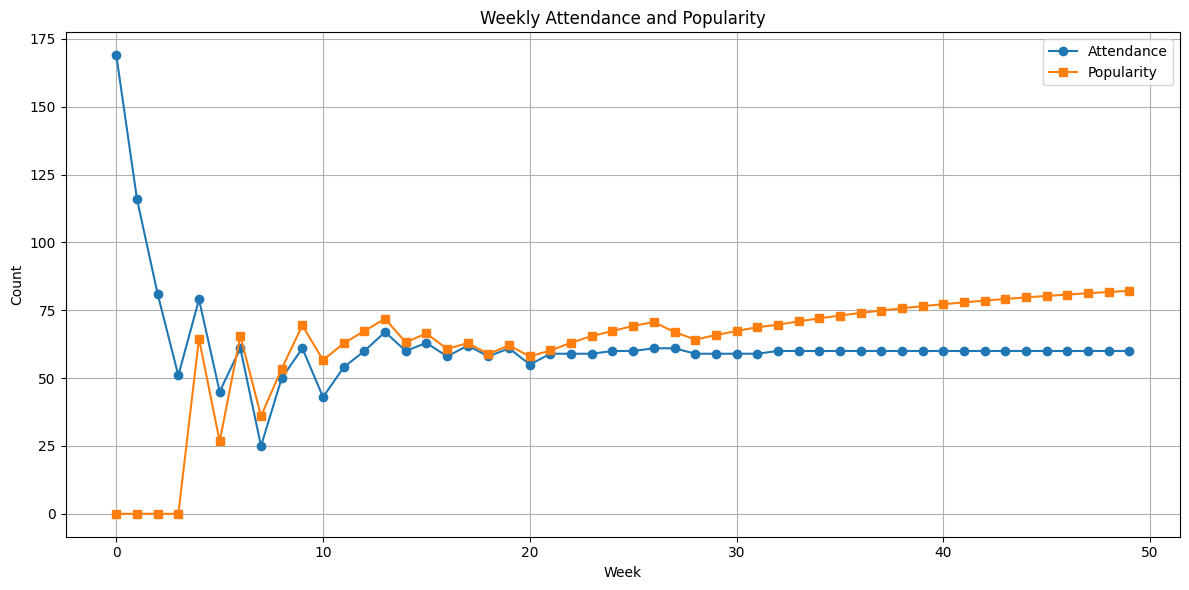

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_bar['Week'], df_bar['Attendance'], label='Attendance', marker='o')
plt.plot(df_bar['Week'], df_bar['Popularity'], label='Popularity', marker='s')

plt.title('Weekly Attendance and Popularity')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


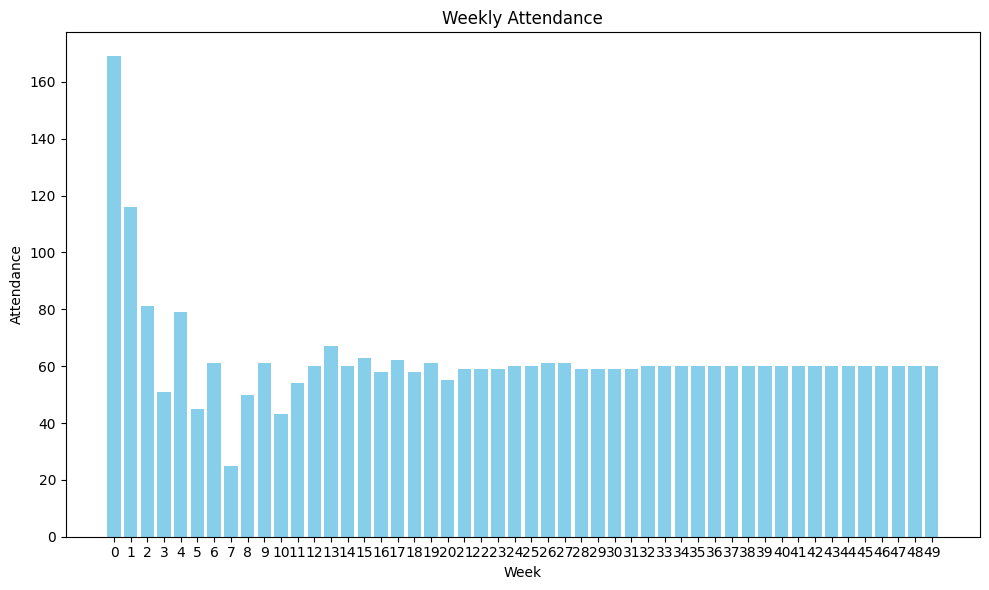

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(df_bar['Week'], df_bar['Attendance'], color='skyblue')

plt.title('Weekly Attendance')
plt.xlabel('Week')
plt.ylabel('Attendance')
plt.xticks(df_bar['Week']) 


plt.tight_layout()
plt.show()


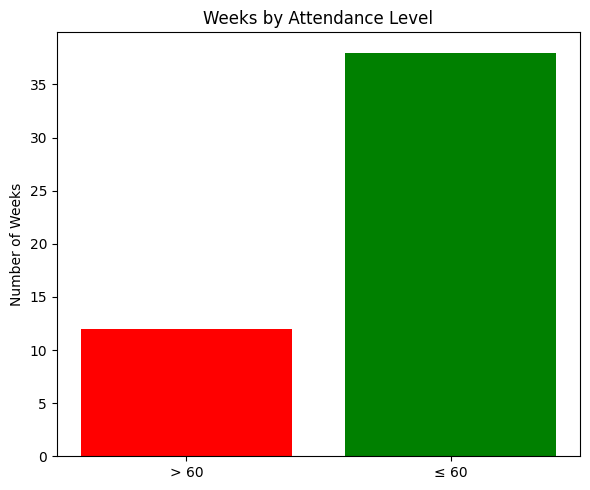

In [12]:
over_60 = df_bar['Attendance'] > 60
under_or_equal_60 = df_bar['Attendance'] <= 60

counts = [over_60.sum(), under_or_equal_60.sum()]
labels = ['> 60', '≤ 60']

plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['red', 'green'])

plt.title('Weeks by Attendance Level')
plt.ylabel('Number of Weeks')
plt.tight_layout()
plt.show()
